<a href="https://colab.research.google.com/github/hasanzeynal/Deep-Learning-Recipes/blob/main/PyTorch-Projects/tomorrow_rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disclaimer:** This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Dataset description:** RainTomorrow is the target variable to predict. It means - did it rain the next
day, Yes or No? This column is Yes if the rain for that day was 1mm or more.



**Task:** In this case study, you will build your first Neural Network using PyTorch. You will use it to
predict whether or not is going to rain tomorrow using real weather information.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/datasets/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

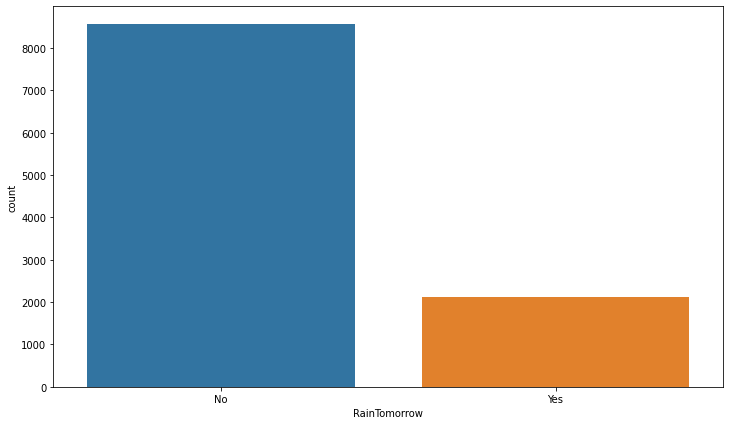

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x=df.RainTomorrow)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

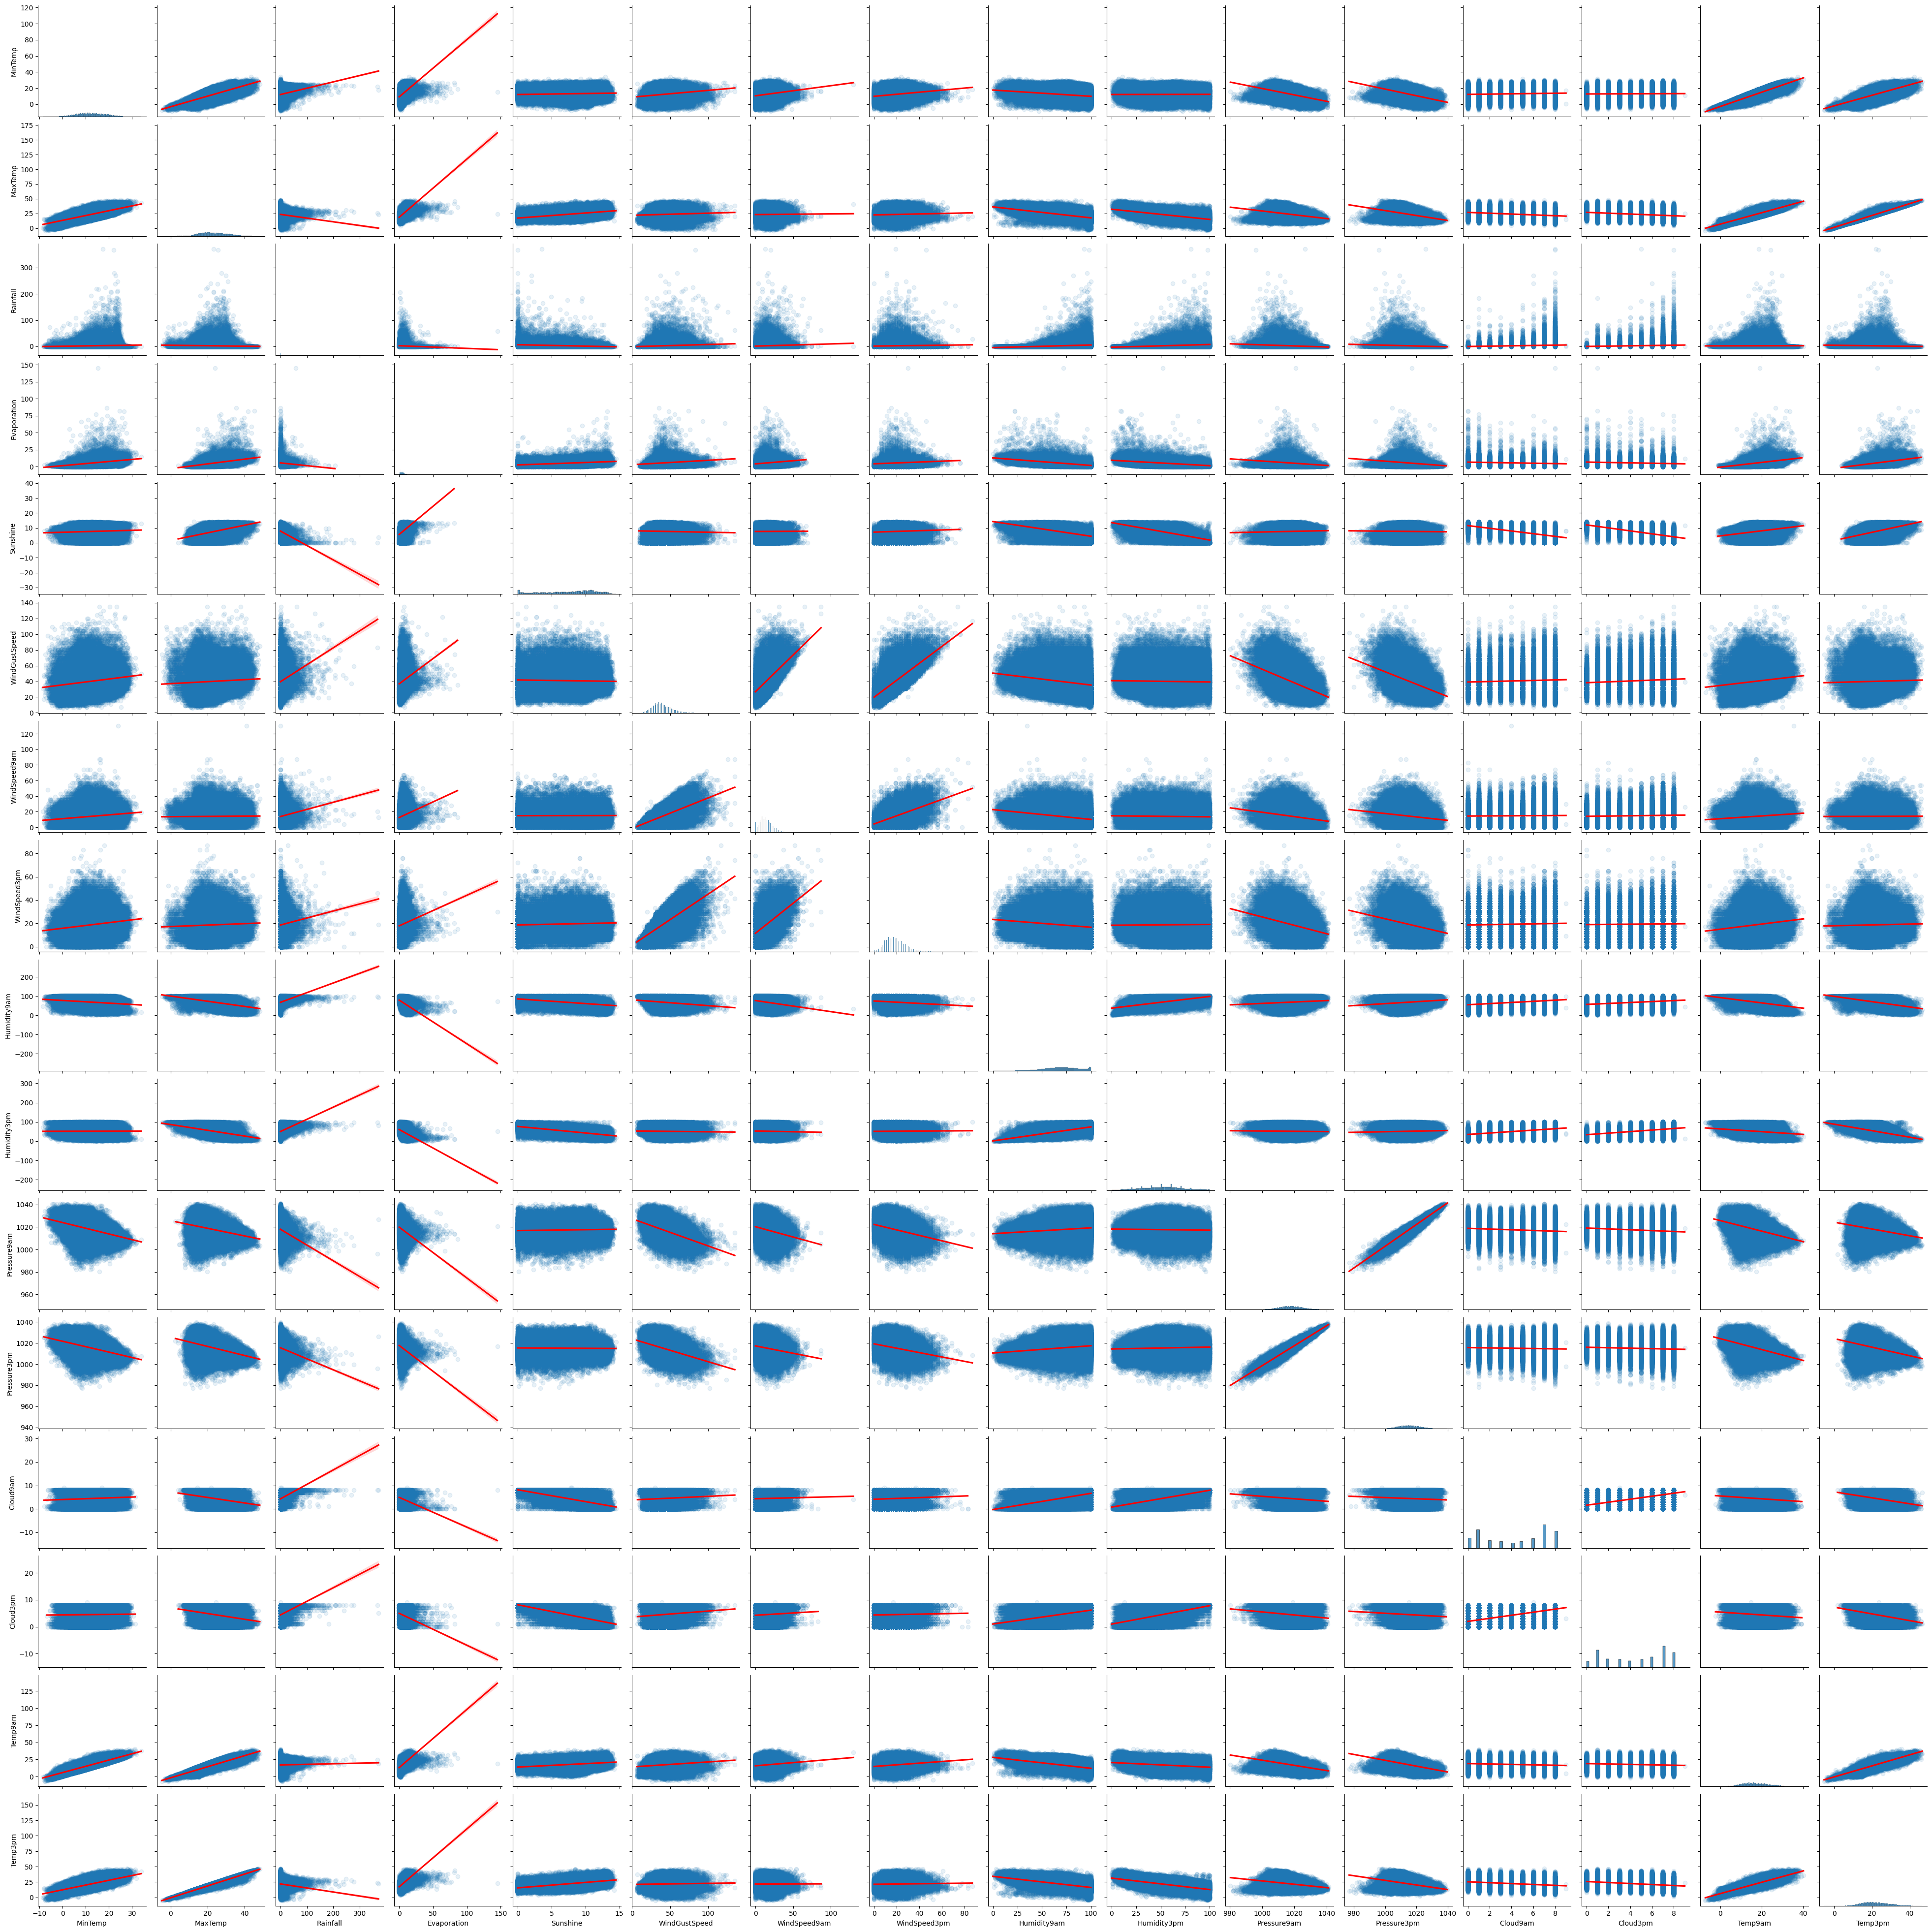

In [ ]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

In [ ]:
import missingno as msno

<Axes: >

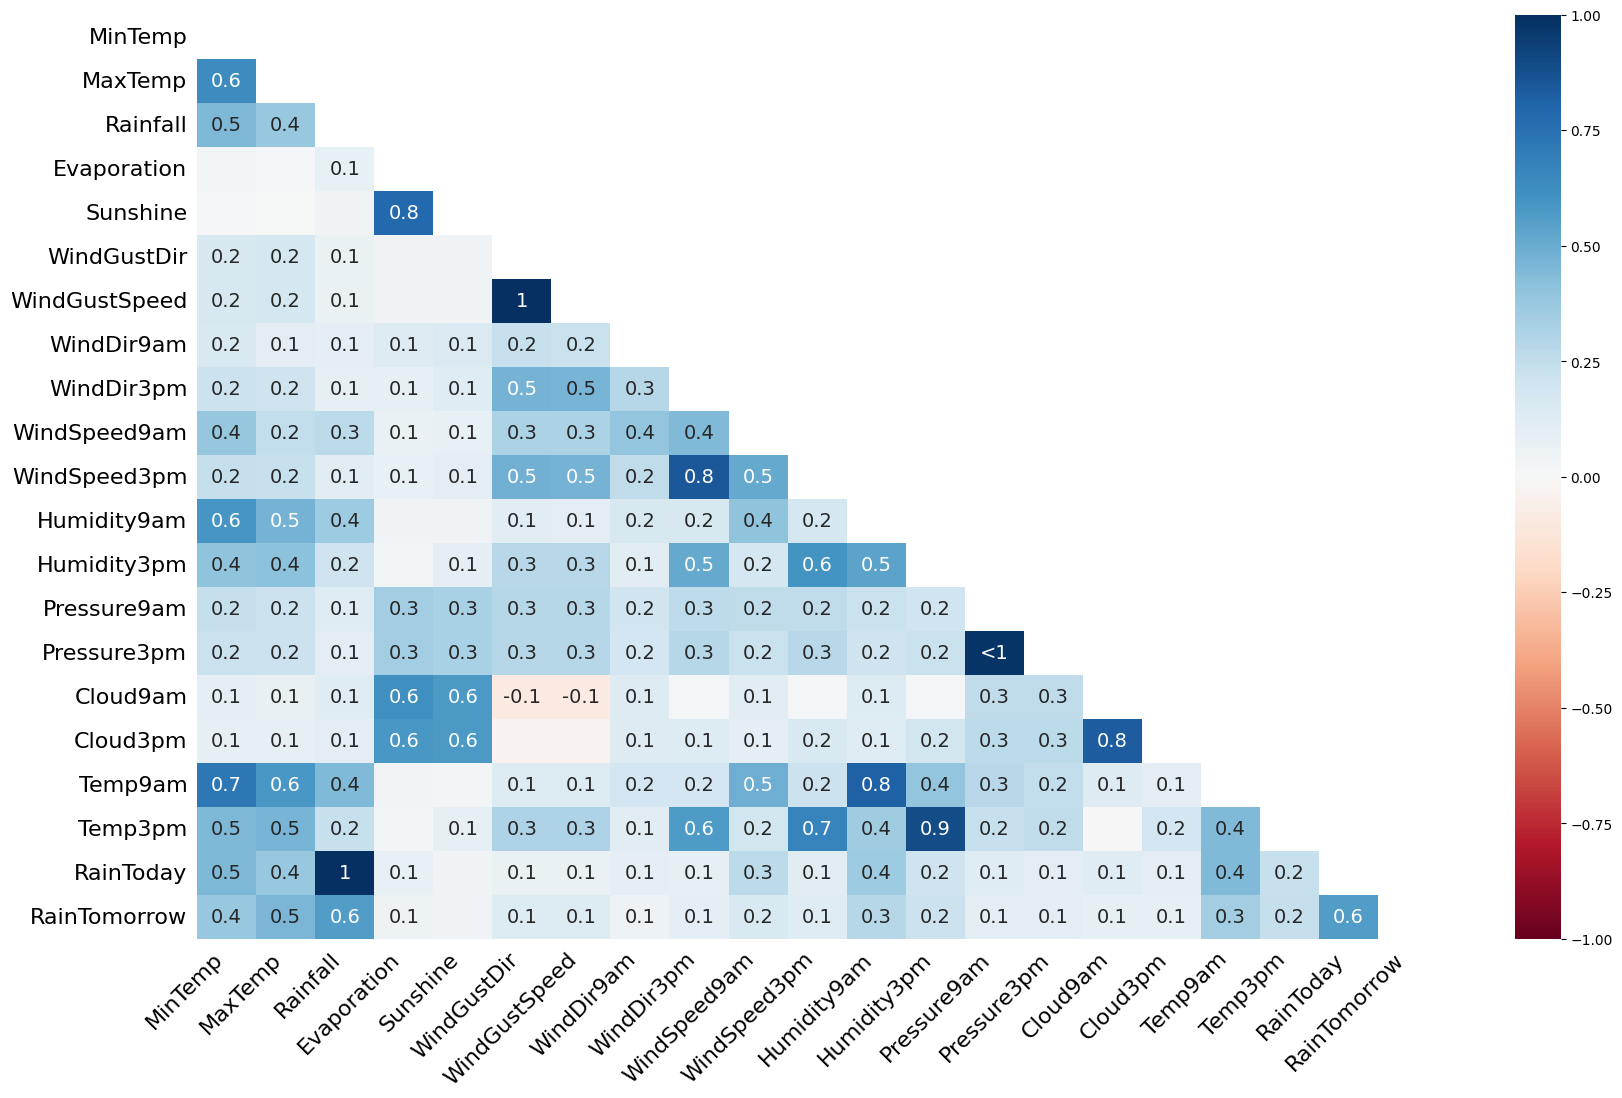

In [ ]:
msno.heatmap(df)

<Axes: >

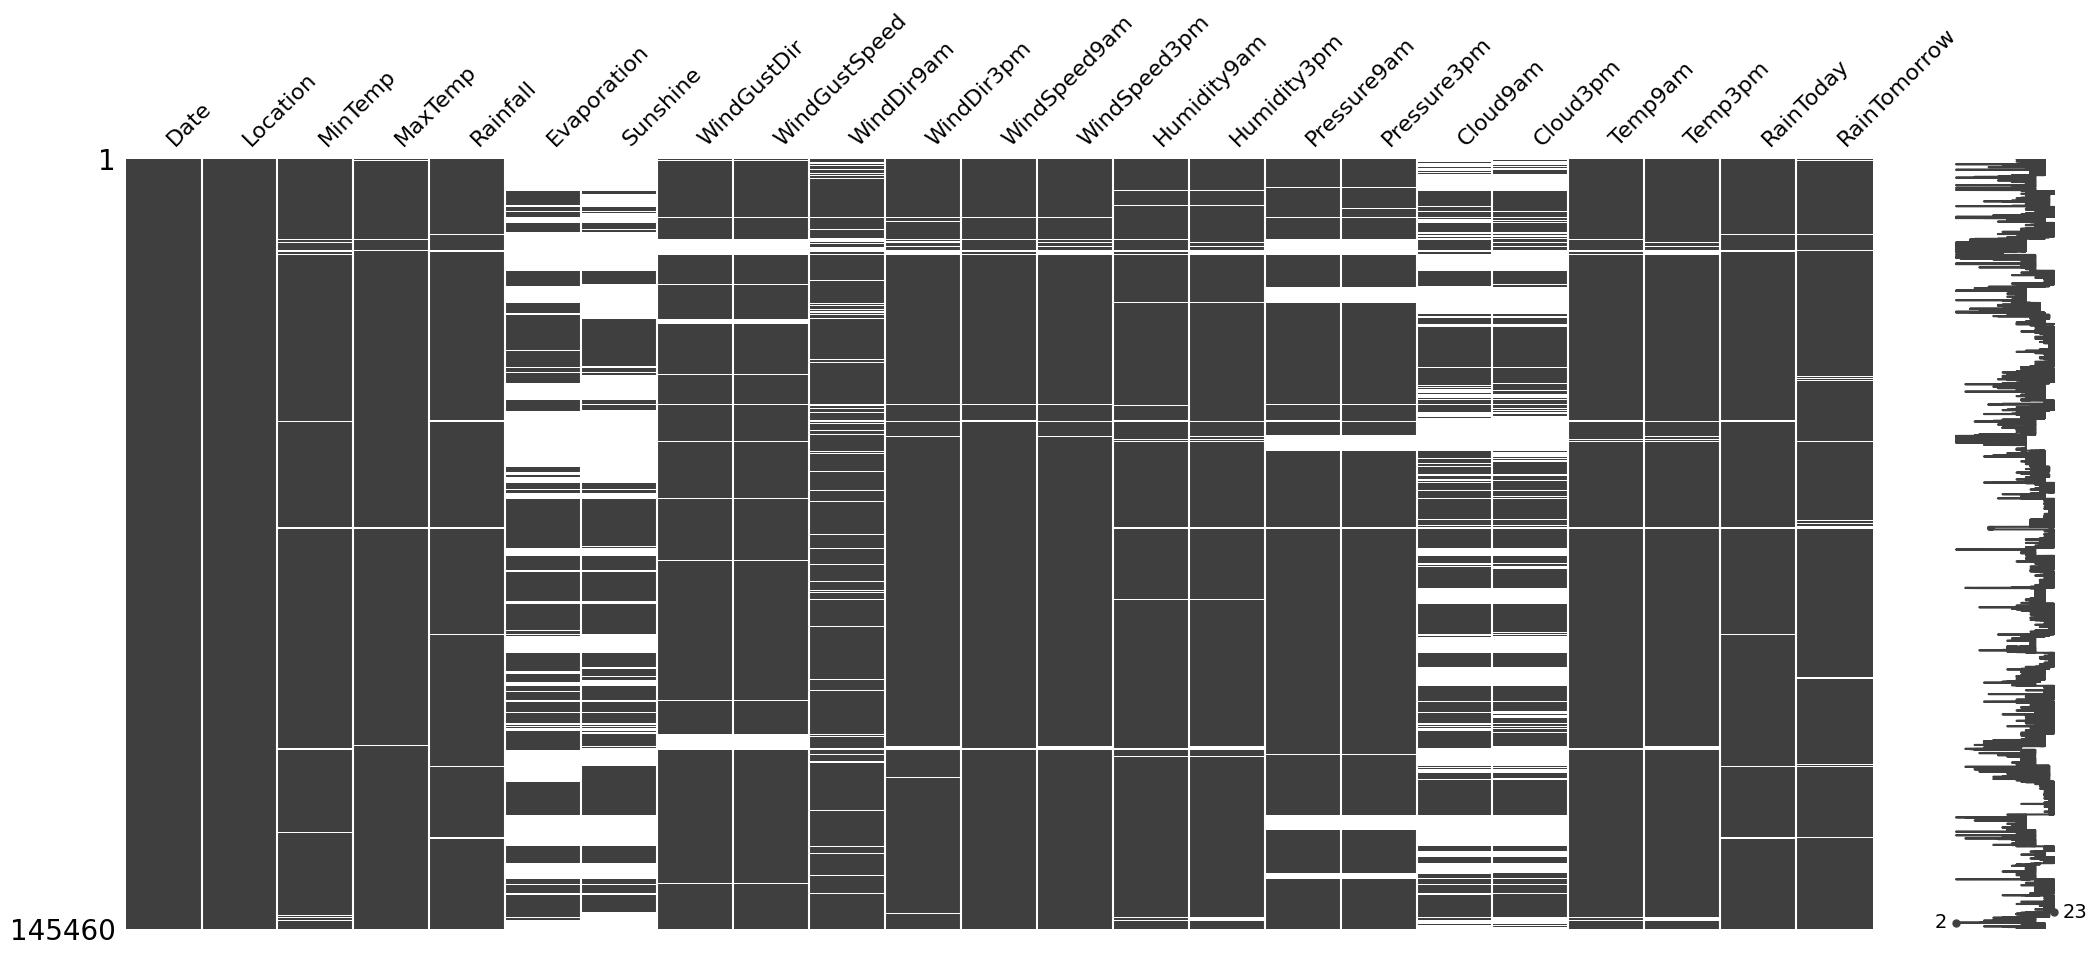

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.shape

(145460, 23)

In [ ]:
#deleting some features that has so many null values
df.drop(['Sunshine','Evaporation','Cloud9am','Cloud3pm'],inplace=True,axis=1)

In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [ ]:
#hiding all 
import warnings
warnings.filterwarnings('ignore')
#filling null values
for i in df.columns:
  if df[i].dtype == 'object':
    df[i][df[i].isnull()] = df[i].mode()
  else:
    df[i][df[i].isnull()] = df[i].median()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df['RainTomorrow'].fillna('No',inplace=True)
df['RainToday'].fillna('No',inplace=True)
df['WindGustDir'].fillna('W',inplace=True)
df['WindDir9am'].fillna('N',inplace=True)
df['WindDir3pm'].fillna('SE',inplace=True)

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Encoding

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i}:{df[i].nunique()}")

Date:3436
Location:49
WindGustDir:16
WindDir9am:16
WindDir3pm:16
RainToday:2
RainTomorrow:2


# Actually,we have different unique values in the Date which is 3417,and when i do some encoding especially like Label encoding,it does not make sense to do label encoding in the Date columns,so,i am gonna delete date label

In [ ]:
df.drop(df.iloc[:,0:1],inplace=True,axis=1)

In [ ]:
categorical_columns = []
for col in df.columns:
  if df[col].dtype == 'object':
    categorical_columns.append(col)

In [ ]:
categorical_df = df[categorical_columns]
numerical_df = df.drop(columns=categorical_columns)

In [ ]:
categorical_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          4.8       8.4   
1        Albury      7.4     25.1       0.0          4.8       8.4   
2        Albury     12.9     25.7       0.0          4.8       8.4   
3        Albury      9.2     28.0       0.0          4.8       8.4   
4        Albury     17.5     32.3       1.0          4.8       8.4   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          4.8       8.4   
145456    Uluru      3.6     25.3       0.0          4.8       8.4   
145457    Uluru      5.4     26.9       0.0          4.8       8.4   
145458    Uluru      7.8     27.0       0.0          4.8       8.4   
145459    Uluru     14.9     22.6       0.0          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0                W           44.0          W        WNW  ...         71.0   
1              WNW           44.0        NNW        WSW  ...         44.0   
2              WSW           46.0          W        WSW  ...         38.0   
3               NE           24.0         SE          E  ...         45.0   
4                W           41.0        ENE         NW  ...         82.0   
...            ...            ...        ...        ...  ...          ...   
145455           E           31.0         SE        ENE  ...         51.0   
145456         NNW           22.0         SE          N  ...         56.0   
145457           N           37.0         SE        WNW  ...         53.0   
145458          SE           28.0        SSE          N  ...         51.0   
145459           W           39.0        ESE        ESE  ...         62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       5.0     16.9   
1              25.0       1010.6       1007.8       5.0       5.0     17.2   
2              30.0       1007.6       1008.7       5.0       2.0     21.0   
3              16.0       1017.6       1012.8       5.0       5.0     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       5.0       5.0     10.1   
145456         21.0       1023.5       1019.1       5.0       5.0     10.9   
145457         24.0       1021.0       1016.8       5.0       5.0     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No            No  

[145460 rows x 22 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_data = pd.get_dummies(df, columns = categorical_columns)

# Converting type of columns to category
df['Location']=df['Location'].astype('category')
df['WindGustDir']=df['WindGustDir'].astype('category')
df['WindDir9am']=df['WindDir9am'].astype('category')
df['WindDir3pm']=df['WindDir3pm'].astype('category')
df['RainToday']=df['RainToday'].astype('category')
df['RainTomorrow']=df['RainTomorrow'].astype('category')
 
# Assigning numerical values and storing it in another columns
df['Location']=df['Location'].cat.codes
df['WindGustDir']=df['WindGustDir'].cat.codes
df['WindDir9am']=df['WindDir9am'].cat.codes
df['WindDir3pm']=df['WindDir3pm'].cat.codes
df['RainToday']=df['RainToday'].cat.codes
df['RainTomorrow']=df['RainTomorrow'].cat.codes
 
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[categorical_columns]))
 
#Merge with main
# New_df=df.join(enc_data)
# #New_df.drop(New_df.columns[[13]], axis=1, inplace=True)
# New_df.head()

In [ ]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0              2     13.4     22.9       0.6          4.8       8.4   
1              2      7.4     25.1       0.0          4.8       8.4   
2              2     12.9     25.7       0.0          4.8       8.4   
3              2      9.2     28.0       0.0          4.8       8.4   
4              2     17.5     32.3       1.0          4.8       8.4   
...          ...      ...      ...       ...          ...       ...   
145455        41      2.8     23.4       0.0          4.8       8.4   
145456        41      3.6     25.3       0.0          4.8       8.4   
145457        41      5.4     26.9       0.0          4.8       8.4   
145458        41      7.8     27.0       0.0          4.8       8.4   
145459        41     14.9     22.6       0.0          4.8       8.4   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0                13           44.0          13          14  ...         71.0   
1                14           44.0           6          15  ...         44.0   
2                15           46.0          13          15  ...         38.0   
3                 4           24.0           9           0  ...         45.0   
4                13           41.0           1           7  ...         82.0   
...             ...            ...         ...         ...  ...          ...   
145455            0           31.0           9           1  ...         51.0   
145456            6           22.0           9           3  ...         56.0   
145457            3           37.0           9          14  ...         53.0   
145458            9           28.0          10           3  ...         51.0   
145459           13           39.0           2           2  ...         62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       5.0     16.9   
1              25.0       1010.6       1007.8       5.0       5.0     17.2   
2              30.0       1007.6       1008.7       5.0       2.0     21.0   
3              16.0       1017.6       1012.8       5.0       5.0     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       5.0       5.0     10.1   
145456         21.0       1023.5       1019.1       5.0       5.0     10.9   
145457         24.0       1021.0       1016.8       5.0       5.0     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8          0             0  
1          24.3          0             0  
2          23.2          0             0  
3          26.5          0             0  
4          29.7          0             0  
...         ...        ...           ...  
145455     22.4          0             0  
145456     24.5          0             0  
145457     26.1          0             0  
145458     26.0          0             0  
145459     20.9          0             0  

[145460 rows x 22 columns]

In [ ]:
#final_data = df.to_numpy()

In [ ]:
X = df.drop(df.iloc[:,17:18],axis=1)
y = df.iloc[:,17:18]

In [ ]:
#scalling on intependent variables(X)
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X = rs.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Method 1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset

In [ ]:
import numpy as np

In [ ]:
X_train = torch.as_tensor(np.array(X_train).astype('float32'))
X_test = torch.as_tensor(np.array(X_test).astype('float32'))
y_train = torch.as_tensor(np.array(y_train).astype('float32'))
y_test = torch.as_tensor(np.array(y_test).astype('float32'))

In [ ]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,shuffle=True)

In [ ]:
train_loader.batch_size

64

# Building Neural Network Model

In [ ]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 1)
        self.softmax = torch.nn.Softmax()

    def forward(self, X):
        x = self.linear1(X)
        x = self.activation(X)
        x = self.linear2(X)
        x = self.softmax(X)
        return X

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=1, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=1, bias=True)


Model params:
Parameter containing:
tensor([[ 0.0255, -0.0181, -0.0033,  ..., -0.0743,  0.0817, -0.0794],
        [ 0.0091,  0.0973, -0.0673,  ...,  0.0350, -0.0241, -0.0260],
        [-0.0571, -0.0347, -0.0340,  ...,  0.0735,  0.0873,  0.0553],
        ...,
        [ 0.0803, -0.0976,  0.0618,  ..., -0.0252, -0.0045,  0.0762],
        [ 0.0194,  0.0778, -0.0685,  ...,  0.0538, -0.0503,  0.0497],
        [ 0.0953, -0.0867,  0.0825,  ..., -0.0373, -0.0112,  0.0737]],
       requires_grad=True)
Parameter containing:
tensor([-0.0897,  0.0313, -0.0544,  0.0677, -0.0767,  0.0764,  0.0522,  0.0408,
        -0.0332, -0.0632,  0.0846,  0.0962,  0.0160, -0.0041,  0.0834, -0.0697,
        -0.0260,  0.0208, -0.0550,  0.0130

In [ ]:
X_train.shape

torch.Size([116368, 17])

In [ ]:
X_test.shape

torch.Size([29092, 17])

In [ ]:
y_train.shape

torch.Size([116368, 1])

In [ ]:
y_test.shape

torch.Size([29092, 1])

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(tinymodel.parameters(), lr=0.01, momentum=0.9)

In [ ]:
def test(dataloader, tinymodel):
    size = len(dataloader.dataset)
    tinymodel.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = tinymodel(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
def train(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()

        # Compute prediction error
        pred = model(X)
        loss = criterion(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# epochs = 5
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train(train_loader, tinymodel, criterion, optimizer)
#     test(test_loader, tinymodel)
# print("Done!")

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig, NodeConfig, TabNetModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.categorical_encoders import CategoricalEmbeddingTransformer

In [ ]:
data_config = DataConfig(
    target=['target'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
    continuous_feature_transform="quantile_normal",
    normalize_continuous_features=True
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=32,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-4096-512",  # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    learning_rate = 1e-3,
    metrics=["accuracy"]
)
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

method

# Method 2

In [ ]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         2     13.4     22.9       0.6           13           44.0   
1         2      7.4     25.1       0.0           14           44.0   
2         2     12.9     25.7       0.0           15           46.0   
3         2      9.2     28.0       0.0            4           24.0   
4         2     17.5     32.3       1.0           13           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   
3           9           0          11.0           9.0         45.0   
4           1           7           7.0          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0         22.0       1007.7       1007.1     16.9     21.8          0   
1         25.0       1010.6       1007.8     17.2     24.3          0   
2         30.0       1007.6       1008.7     21.0     23.2          0   
3         16.0       1017.6       1012.8     18.1     26.5          0   
4         33.0       1010.8       1006.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
pip install -U pytorch_tabular


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
 pip install PyTorch_tabular[all]

In [ ]:
#import PyTorch_tabular
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
 
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Function to evaluate network
def print_metrics(y_true, y_pred, tag):
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
        y_pred = y_pred.values
    if y_true.ndim>1:
        y_true=y_true.ravel()
    if y_pred.ndim>1:
        y_pred=y_pred.ravel()
    val_acc = accuracy_score(y_true, y_pred)
    val_f1 = classification_report(y_true, y_pred)
    print(f"{tag} Acc: {val_acc} | {tag} Classification Report \n: {val_f1}")

In [ ]:
# prepare data in the form that framework accepts
file2 = pd.DataFrame(df.RainTomorrow, columns=['RainTomorrow'])
 



In [ ]:
data_config = DataConfig(
    target = list(df['RainTomorrow']), #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols = df[categorical_columns],
  
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()
 
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-512",  # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    learning_rate = 1e-3
)

In [ ]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

In [ ]:
tabular_model.fit(train=train, validation=val)

DataConfig(target=['RainTomorrow'], continuous_cols=Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object'), categorical_cols=[], date_columns=[], encode_date_columns=True, validation_split=0.2, continuous_feature_transform=None, normalize_continuous_features=True, quantile_noise=0, num_workers=0, pin_memory=True, handle_unknown_categories=True, handle_missing_values=True)

In [ ]:
pred_df = tabular_model.predict(test)
print_metrics(test['target'], pred_df["prediction"], tag="Holdout")

In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device

'cuda'

# Method 3

In [ ]:
class TitanicModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(34, 14546)
        self.linear2 = nn.Linear(14546, 29092)
        self.linear3 = nn.Linear(29092, 58184)   
        self.linear4 = nn.Linear(58184, 116368)
        self.linear5 = nn.Linear(116368, 58184)
        self.linear6 = nn.Linear(58184, 29092)
        self.linear7 = nn.Linear(29092, 14546)
        self.linear8 = nn.Linear(14546, 32)
        self.linear9 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        return self.linear9(self.linear8(self.linear7(self.linear6(self.linear5(self.relu(self.linear4(self.dropout(self.relu(self.linear3(self.dropout(self.relu(self.linear2(self.dropout(self.relu(self.linear1(x))))))))))))))))

In [ ]:
 model = TitanicModel()
 model

In [ ]:
learning_rate = 0.003

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [ ]:
# Forward pass
logits = model(X_train)
print('logits:', logits[:5])

# Logits -> Probabilities b/n 0 and 1 -> Rounded to 0 or 1
pred_probab = torch.round(torch.sigmoid(logits))
print('probabilities:', pred_probab[0:5])

In [ ]:
X_train

array([[-0.92      ,  0.27472527, -0.47058824, ..., -0.05434783,
         0.        ,  1.        ],
       [-0.32      ,  1.38461538,  1.65686275, ...,  1.45652174,
         1.90526316,  0.        ],
       [-0.2       ,  0.2967033 ,  0.39215686, ...,  0.06521739,
         0.35789474,  0.        ],
       ...,
       [ 0.16      , -0.48351648, -0.08823529, ..., -0.32608696,
         0.01052632,  0.        ],
       [-0.36      , -0.35164835, -0.76470588, ..., -0.2826087 ,
        -0.78947368,  0.        ],
       [ 0.28      ,  0.41758242,  1.76470588, ...,  1.45652174,
         1.34736842,  0.        ]])

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [ ]:
# Number of epochs
epochs = 10000

# Send data to the device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(X_train).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid).squeeze()
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())